In [1]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

api = wandb.Api()

sweeps = ['2v6h3nol']
dfs = []
for s in sweeps:
    sweep = api.sweep(f"clip_cl/CL-Similarity/{s}")
    results = []
    for run in sweep.runs:
        summary = {k: v for k, v in run.summary._json_dict.items()
                if not k.startswith('_')}
        config = {k: v for k, v in run.config.items()
                if not k.startswith('_')}
        name = {'name': run.name}
        results.append(summary | config | name)

    dfs.append(pd.DataFrame(results))
df = pd.concat(dfs)

In [11]:
def plot(df, filters, x='mixup_lambda', hue='mixup_type', figsize=(10, 8), savefig=None, title=None):
    f = sorted(df[filters].unique())
    n = len(f)
    fig, ax = plt.subplots(2, n, figsize=figsize)
    for i, y in enumerate(['all_sims', 'mean_fgt']):
        for j in range(n):
            df_f = df.loc[df[filters] == f[j]]
            sns.lineplot(data=df_f, x=x, y=y, hue=hue, ci='sd', ax=ax[i][j])
            ax[i][j].set_title(f'{filters}={f[j]}')
    fig.tight_layout()
    if title:
        fig.suptitle(title)
    if savefig:
        fig.savefig(savefig)


In [15]:
runs_df = df
runs_df.shape
runs_df = runs_df.loc[(runs_df['cl_acc'].notna()) &
                 (runs_df['model'] == 'resnet')]
runs_df = runs_df.groupby(as_index=False, by=['model', 'dataset', 'lr', 'batch_size', 'mixup_lambda', 'mixup_type', 'seed', 'optim', 'task2vec_combined_head']).mean()
print(runs_df.shape)

(264, 53)


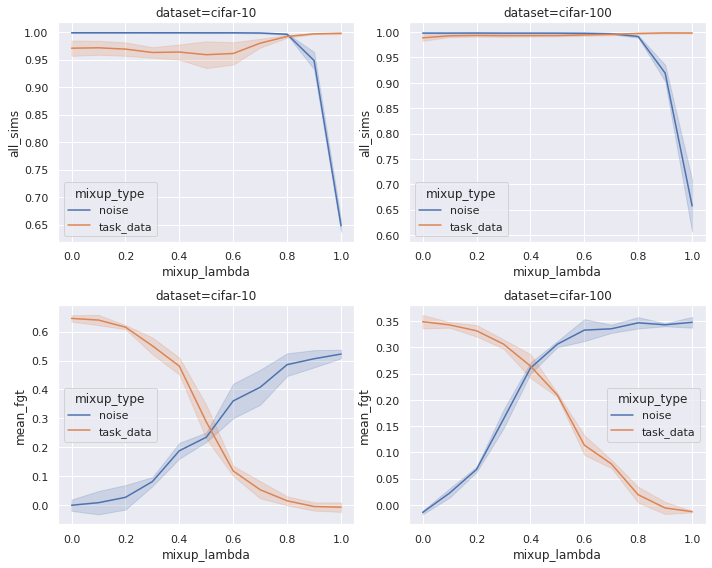

In [16]:
# # plot(runs_df, 'lr')
# # plot(runs_df, 'optim')

runs_df = runs_df.loc[(runs_df['task2vec_combined_head'] == True)]
runs_df.shape
plot(runs_df, 'dataset', savefig='../figures/mixup_combined_head_true.png')


<AxesSubplot:xlabel='mixup_lambda', ylabel='mean_fgt'>

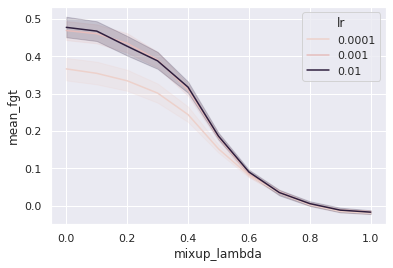

In [9]:
sns.lineplot(data=df, x='mixup_lambda', y='mean_fgt', hue='lr')